### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Assignment 1

Provide answers to the problems in the boxes provided.  Marks will be awarded for
participation and engagement.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github](https://github.com/gpfeiffer/cs4423) repository.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [1]:
import networkx as nx
import numpy as np
import string
import random
from random import choice
from networkx import is_isomorphic
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

##  1. Warmup.

The purpose of this task is to get you used to working with the `networkx` package
in the `jupyter` notebook environment.

1. Define a new (simple) graph `G` on the vertex set $X = \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$
with edges $0-1$, $1-2$, $2-3$, $3-4$, $4-5$, $5-6$, $6-7$, $7-8$, $8-9$, and $9-0$.
Draw the graph.  Hence or otherwise determine its **order** (the number of nodes)
and its **size** (the number of links).

Order: 10
Size: 10


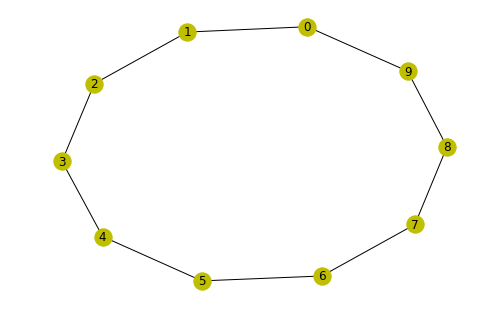

In [35]:
# Part 1: Define edge set, draw graph and determine order and size

# Edge set: 0−1 , 1−2, 2−3, 3−4, 4−5, 5−6, 6−7, 7−8, 8−9, and 9−0
edges = [(i, (i+1)%10) for i in range(10)]

# Construct graph
G = nx.Graph(edges)

# Order and size
print('Order: ' + str(G.order()))
print('Size: ' + str(G.size()))

# Draw Graph
nx.draw(G, **opts)

2. Find the **adjacency matrix** $A$ of the graph `G`.  Then compute its square, $A^2$,
and draw the graph `G2` that has $A^2$ as its adjacency matrix.  What are the connected components of `G2`? 

Adjacency Matrix of A 
[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


Adjacency Matrix of A^2 
[[2 0 1 0 0 0 0 0 1 0]
 [0 2 0 1 0 0 0 0 0 1]
 [1 0 2 0 1 0 0 0 0 0]
 [0 1 0 2 0 1 0 0 0 0]
 [0 0 1 0 2 0 1 0 0 0]
 [0 0 0 1 0 2 0 1 0 0]
 [0 0 0 0 1 0 2 0 1 0]
 [0 0 0 0 0 1 0 2 0 1]
 [1 0 0 0 0 0 1 0 2 0]
 [0 1 0 0 0 0 0 1 0 2]]


Connected Components of G2: [{0, 2, 4, 6, 8}, {1, 3, 5, 7, 9}]


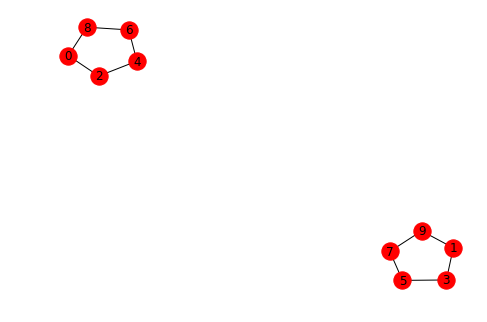

In [3]:
# Part 2: adj matrix, square of adj matrix, connected components

# Adj matrix of G
A = nx.adjacency_matrix(G)
print('Adjacency Matrix of A \n' + str(A.todense()))

# Adj matrix squared
A2 = A**2
print('\n\nAdjacency Matrix of A^2 \n' + str(A2.todense()))

# Draw graph of A squared
G2 = nx.from_numpy_matrix(A2.todense())
nx.draw(G2, with_labels=True)

# Connected components of A squared graph
connected_components = list(nx.connected_components(G2))
print('\n\nConnected Components of G2: ' + str(connected_components))

##  2.  Projections

Suppose that $G$ is a bipartite graph on a vertex set that is the disjoint union of two sets $X$ and $Y$, where each edge
connects a verte in $X$ to a vertex in $Y$.  The **projection** of $G$ onto the set $X$
is the graph with vertex set $X$, where any two elements are joined by an edge whenever
they are joined to a common element $y \in Y$ in the graph $G$.  
The adjacency matrix of the projection can be derived from the square $A^2$ of the adjacency matrix
$A$ of $G$.

Consider the affilliation network below, with $11$ people labelled $A$ to $K$,
and four foci labelled $1$, $2$, $3$ and $4$, 

![bipartite graph](images/bipartite.png)

1.  Compute the adjacency matrix of $G$.

2. Draw the projection on (just)
   the people, in which two people are joined by an edge if they have a common
   focus.
   (Of course, one can do this easily by hand.  It would be nice to get
   `networkx` to do it for you.)

3. Compute the adjacency matrix $B$ of the projection
   and compare it to $A^2$.  What do you observe?

Adjacency Matrix of G: 
[[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


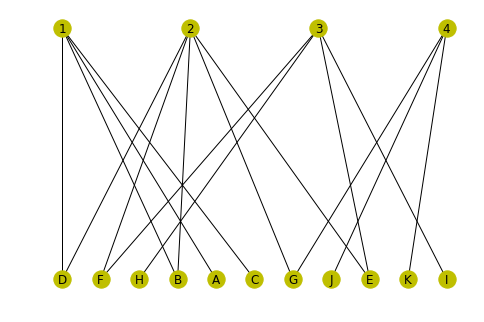

In [4]:
# Part 1: Compute adj matrix of G

# First Construct G 
edges = [(1,'A'), (1,'B'), (1,'C'), (1,'D'), (2,'B'), (2,'D'), (2,'E'), (2,'F'), (2,'G'), (3,'E'), (3,'F'), (3,'H'), (3,'I'), (4,'G'), (4,'J'), (4,'K')]
G = nx.Graph(edges)
top = nx.bipartite.sets(G)[0] # We want to position the nodes on the graph to portray a bipartite structure
pos = nx.bipartite_layout(G, top, align='horizontal') # Use pos attribute to position each node relatively to eachother

# Draw Graph
nx.draw(G, pos, **opts)

# Now compute adj matrix
A = nx.adjacency_matrix(G)
print('Adjacency Matrix of G: \n' + str(A.todense()))

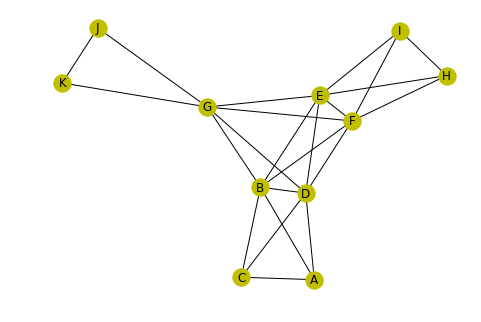

In [5]:
# Part 2: Draw the projection on (just) the people, in which two people are joined by an edge if they have a common focus

# Get top and bottom sets
top = nx.bipartite.sets(G)[0]
bottom = nx.bipartite.sets(G)[1]

# Draw the projection on (just) the people (Bottom set)
P = nx.bipartite.projected_graph(G, bottom)
nx.draw(P, **opts)

In [6]:
# Part 3: Compute the adjacency matrix 𝐵 of the projection and compare it to  𝐴2 . What do you observe?

# B is adj matrix of projection P
B = nx.adjacency_matrix(P)
print('Adjacency matrix B of Projection: \n')
print(B.todense())

# Compare with A2
A2 = A**2
print('\n\nAdjacency matrix A2: \n')
print(A2.todense())

Adjacency matrix B of Projection: 

[[0 1 0 1 1 1 1 0 1 0 0]
 [1 0 1 1 0 0 1 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0 1]
 [1 1 0 0 1 1 1 0 1 0 0]
 [1 0 0 1 0 1 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 1 0]
 [1 1 1 1 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 1 0 0 0]
 [0 1 1 0 0 0 0 0 1 0 0]]


Adjacency matrix A2: 

[[4 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 2 1 2 0 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 2 1 2 0 1 1 1 0 0 0 0 0 0]
 [2 0 0 0 0 5 0 0 0 2 0 0 1 0 0]
 [0 0 1 0 1 0 2 2 1 0 1 1 0 0 0]
 [0 0 1 0 1 0 2 2 1 0 1 1 0 0 0]
 [0 0 1 0 1 0 1 1 2 0 0 0 0 1 1]
 [0 0 0 0 0 2 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]]


... text goes here ...

## 3. Random Trees

The `nx.random_tree(n)` command can be used to generate a random tree on the `n` vertices
represented in `python` by `range(n)`.

Such a tree can be converted into a sequence of $n - 2$ numbers, its **Prüfer code** by the
`python` function `pruefer_code`, defined as follows:

In [7]:
def pruefer_node(tree):
    for x in tree:
        if tree.degree(x) == 1:
            for y in tree[x]:
                tree.remove_node(x)
                return y

def pruefer_code(T):
    tree = T.copy()
    return [pruefer_node(tree) for k in range(tree.order() - 2)]

In [8]:
T = nx.random_tree(12)

In [9]:
code = pruefer_code(T)
code

[7, 11, 6, 3, 3, 2, 1, 10, 8, 7]

Conversely, the following function `tree_pruefer` constructs a tree from a
Prüfer code.

In [10]:
def tree_pruefer(code):

    # initialize graph and defects
    n = len(code) + 2
    tree = nx.empty_graph(n)
    defects = [1 for x in tree]
    for y in code:
        defects[y] += 1
        
    # add edges
    for y in code:
        for x in tree:
            if defects[x] == 1:
                tree.add_edge(x, y)
                for z in (x, y):
                    defects[z] -= 1
                break
                
    # final edge
    e = [x for x in tree if defects[x] == 1]
    tree.add_edge(*e)
    
    return tree

In [11]:
T2 = tree_pruefer(code)

1. Construct a few random trees on $n = 10, 11, 12, \ldots$ nodes.  For each such tree,
   draw it, compute its Prüfer code and then convert the code back into a tree.
   Do you get your old tree back?

2. For a few randomly chosen Prüfer codes, construct the corresponding tree, 
   draw it if you want, and convert it back into a Prüfer code.
   Do you get your olc code back?
   
3. Which tree on $n$ nodes corresponds to the Prüfer code 
   consisting of $n-2$ entries $0$?

Pruefer Code: [8, 6, 2, 4, 4, 6, 6, 2]


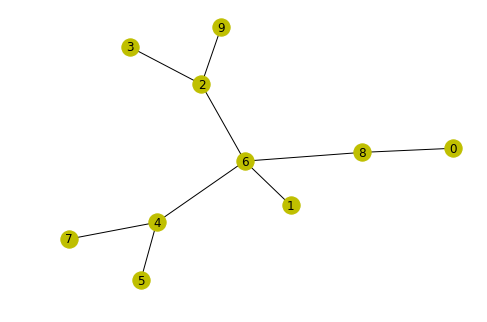

In [12]:
# Part 1: Construct few random trees, draw them, get Pruefer codes and convert back to trees

# Choose random n between 10 and 15
N = random.randint(10, 15)
# Construct random tree on n
T = nx.random_tree(N)
# Draw it
nx.draw(T, **opts)
# Compute Pruefer Code
code = pruefer_code(T)
print("Pruefer Code: " + str(code))

# Record this trees properties to compare with new tree (could compare each property or just use is_isomorphic())
degree = T.degree()
nodes = T.nodes()
edges = T.edges()

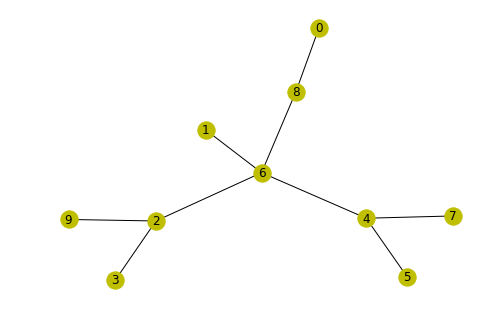

In [13]:
# Convert code into tree
T2 = tree_pruefer(code)
nx.draw(T2, **opts)

# Record new properties
degree2 = T2.degree()
nodes2 = T.nodes()
edges2 = T.edges()

In [14]:
# Compare trees. Q: Do you get old tree back?
d = str(degree) == str(degree2)
n = str(nodes) == str(nodes2)
e = str(edges) == str(edges2)

print("Same Degree set: " + str(d))
print("Same Node set: " + str(n))
print("Same Edge set: " + str(e))

if (d & n & e): print("\nYes, we get the same tree back")
else: print("\nNo, trees are not the same")

Same Degree set: True
Same Node set: True
Same Edge set: True

Yes, we get the same tree back


In [15]:
# Do the same for a 3 more random trees with n = 10,11,12 ... nodes
amt = 3

# Choose random n's between 10 and 15
# Ns = [random.randint(10, 15) for i in range(amt)]
Ns = [10 for i in range(amt)]

# Construct random trees on n's
Ts = [nx.random_tree(Ns[i]) for i in range(amt)]

# Compute Pruefer Codes
codes = [pruefer_code(Ts[i]) for i in range(amt)]
print("Pruefer Codes: \n" + str(codes))

# Convert codes back into trees
T2s = [tree_pruefer(codes[i]) for i in range(amt)]

# Compare trees (use is_isomorphic this time to confirm equality)
for i in range(amt):
    print('Tree ' + str(i) + ' is the same: ' + str(is_isomorphic(Ts[i], T2s[i])))

Pruefer Codes: 
[[1, 4, 1, 8, 1, 8, 7, 3], [5, 0, 6, 5, 2, 0, 1, 0], [6, 7, 6, 0, 8, 6, 7, 9]]
Tree 0 is the same: True
Tree 1 is the same: True
Tree 2 is the same: True


Random Codes: 
[[8, 1, 9, 3, 2, 2, 8, 10, 10, 2, 5, 10], [7, 8, 3, 9, 7, 4, 2, 7, 1, 6, 10, 2], [2, 3, 3, 1, 1, 8, 9, 7, 3, 10, 1, 5]]

Building trees from codes... Drawing one below

Yes, same codes after constructing tree and converting back to preufer codes


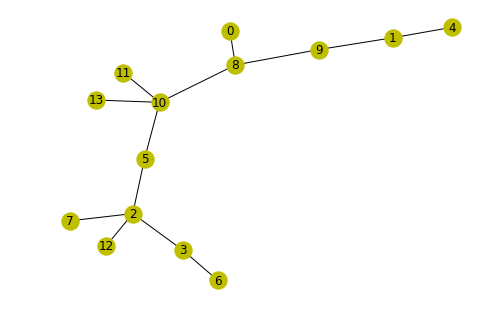

In [16]:
# Part 2: choose random preufer codes (3), build trees, convert back, compare difference
amt = 3

# Randomly choose pruefer codes: using same random int generated earlier for N
random_codes = [[random.randint(1, N) for i in range(N +2)] for j in range(amt)]
print('Random Codes: \n' + str(random_codes))

# Construct corresponding trees
Ts = [tree_pruefer(random_codes[i]) for i in range(amt)]
print('\nBuilding trees from codes... Drawing one below\n')

# Draw one
nx.draw(Ts[0], **opts)

# Convert back to pruefer code. Q: Same code back? 
T_codes = [pruefer_code(Ts[i]) for i in range(amt)]
if(T_codes == random_codes): print('Yes, same codes after constructing tree and converting back to preufer codes')
else: print('No, Codes are not the same')

This Pruefer Code produces a Star Graph: https://en.wikipedia.org/wiki/Star_(graph_theory
Star Graph: S8


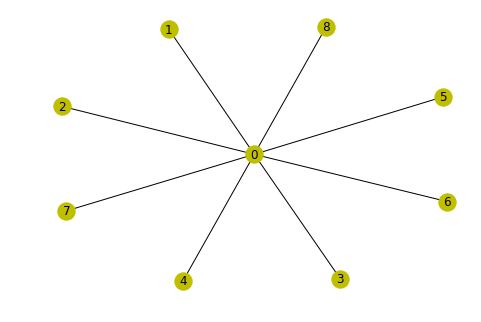

In [17]:
# Part 3: Which tree on  𝑛  nodes corresponds to the Prüfer code consisting of  𝑛−2  entries  0 ?

# n nodes (random int between 5 and 10 to keep graph tidy)
n = random.randint(5, 10)

# Pruefer Code with n-2 entries = 0
code = [0 for i in range(n-2)]

# Build tree from code
T = tree_pruefer(code)
nx.draw(T, **opts)

# Observe Result (Star Graph)
print("This Pruefer Code produces a Star Graph: https://en.wikipedia.org/wiki/Star_(graph_theory")
print("Star Graph: S" + str(n-1))

... text goes here ...

## 4. Breadth First Search.

Breadth First Search (BFS) is a versatile and efficient strategy for systematically visiting
all the nodes in a graph.

Given a graph $G = (X, E)$ and a starting point $x \in X$, BFS can be described as the following sequence of steps.

1. mark all nodes of $G$ as "unseen".

2. initialize a list `seen = [x]` and mark `x` as seen.

3. loop over the elements `y` in the list `seen` and, in each step, visit the
   node `y` and add all of `y`'s neighbors that have not been marked as "seen"
   to the list `seen` and mark them as seen.


### For Example

Consider the graph on the vertex set `"ABCDEFGHIJ"`
defined in the nearby file `data/bfs.adj` by adjacency lists.

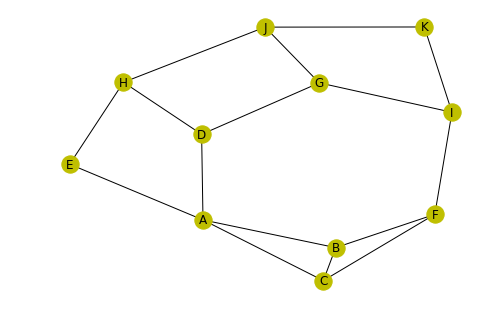

In [18]:
G = nx.read_adjlist("data/bfs.adj")
nx.draw(G, **opts)

Let's say we want to start exploring the graph at vertex `'A'`

In [19]:
x = 'A'

**Step 1.** For each of its nodes `x`, the graph object `G` maintains in `G.nodes[x]` a `python` dictionary
that can be used store arbirary attributes of the nodes.  We can use it for an attribute `'seen'`,
which is set to `True` or `False`, depending on whether the node has already been seen by this instance 
of BFS, or not.  Initially it would be false for all nodes.

In [20]:
G.nodes[x]

{}

In [21]:
for y in G:
    G.nodes[y]['seen'] = False

**Step 2.** Initialize a `python` list `seen` to contain `x` only, and set `x`'s `'seen'` attribute to `True`.

In [22]:
seen = [x]
G.nodes[x]['seen'] = True

**Step 3.**  The loop over `seen`.  For each node `y` in the list, print `y`, then
add all of `y`'s unseen neighbors to the end of the list `seen` and mark them
as `"seen"`.  Note how the list `seen` initially has only one element, but grows
over time, until no more new nodes are detected.  
The loop automatically terminates when the end of the list `seen` has been reached.

In [23]:
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

A
B
C
D
E
F
G
H
I
J
K


In a variant of the same BFS strategy, on can construct a tree on the vertex set $X$ that
records the history of how the nodes in the graph $G$ were discovered.

In [24]:
x = 'A'

We set up an empty graph `T` to eventually contain the tree.

In [25]:
T = nx.Graph()

From here it's essentially the same procedure as above ...

In [26]:
for y in G:
    G.nodes[y]['seen'] = False

... except that we need to add the initial vertex `x` to `T` ...

In [27]:
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

... and instead of printing `y`, we add the edges leading to `y`'s children to the tree `T`.

In [28]:
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True

The resulting tree `T` is called a **spanning tree** of the graph `G`.

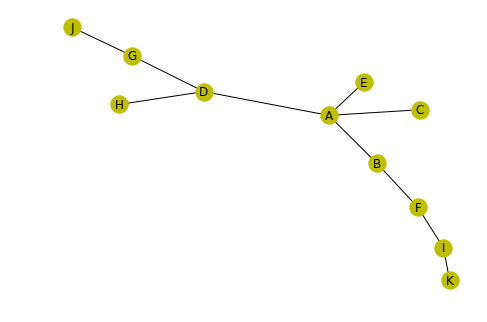

In [29]:
nx.draw(T, **opts)

1. Print out all the nodes of `G` as discovered when the starting point is node `B`.
2. Construct a spanning tree of the graph `G` with node `B` as starting point.
3. Repeat 1 and 2 for one more starting node.
4. Is there a sense of distance between nodes that becomes apparent through these traversals?
   Could a variant of BFS be used to compute such distances between nodes in `G`?

BFS of graph G starting at node: B
B
A
C
F
D
E
I
G
H
K
J


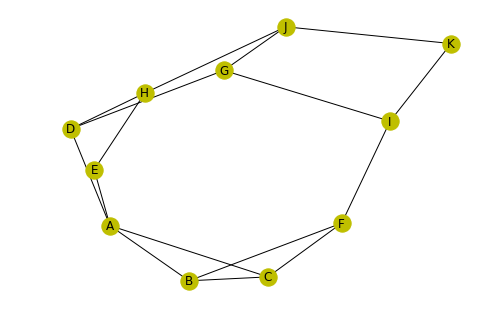

In [30]:
# Part 1: Do BFS and print nodes (using example code from above)
# Drawing G
nx.draw(G, **opts)

# Starting at B
x = 'B'

# mark all nodes of  𝐺  as "unseen".
for y in G:
    G.nodes[y]['seen'] = False
    
# initialize a list seen = [x] and mark x as seen.
seen = [x]
G.nodes[x]['seen'] = True

# loop over the elements y in the list seen and, in each step, 
# visit the node y and add all of y's neighbors that have not been marked as "seen" to the list seen 
# and mark them as seen.
print("BFS of graph G starting at node: " + str(x))
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

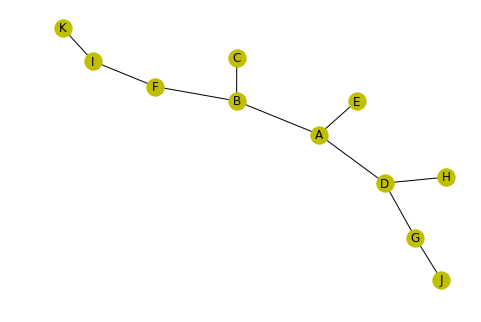

In [31]:
# Part 2: Construct spanning tree (using similar code as above for BFS)
# starting at B
x = 'B'

# setup empty graph
T = nx.Graph()

# mark all nodes of  𝐺  as "unseen".
for y in G:
    G.nodes[y]['seen'] = False
    
# add the initial vertex x to T
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

# instead of printing y, we add the edges leading to y's children to the tree T
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True
            
# Draw spanning tree
nx.draw(T, **opts)

BFS of graph G starting at node: C
C
A
B
F
D
E
I
G
H
K
J


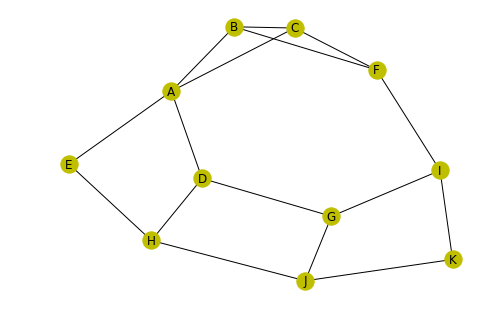

In [32]:
# Part 3: Repeat Part 1 and Part 2 for one more starting node.

# BFS

# Drawing G
nx.draw(G, **opts)

# Starting at C
x = 'C'

# mark all nodes of  𝐺  as "unseen".
for y in G:
    G.nodes[y]['seen'] = False
    
# initialize a list seen = [x] and mark x as seen.
seen = [x]
G.nodes[x]['seen'] = True

# loop over the elements y in the list seen and, in each step, 
# visit the node y and add all of y's neighbors that have not been marked as "seen" to the list seen 
# and mark them as seen.
print("BFS of graph G starting at node: " + str(x))
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

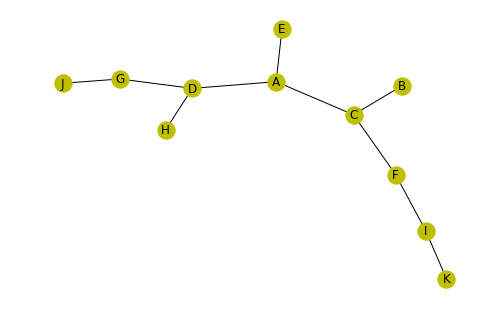

In [33]:
# Spanning Tree

# setup empty graph
T = nx.Graph()

# mark all nodes of  𝐺  as "unseen".
for y in G:
    G.nodes[y]['seen'] = False
    
# add the initial vertex x to T
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

# instead of printing y, we add the edges leading to y's children to the tree T
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True
            
# Draw spanning tree
nx.draw(T, **opts)

Yes, a stronger sense of distance can be observed from a starting node to all other nodes using spanning tree of BFS traversals

DFS (Depth-First Search) is another variant which can be used to compute such distances between nodes
0 [8]
8 [3, 5]
5 [3, 1]
1 [3, 6, 4, 9]
9 [3, 6, 4]
4 [3, 6, 7]
7 [3, 6, 2]
2 [3, 6]
6 [3]
3 []


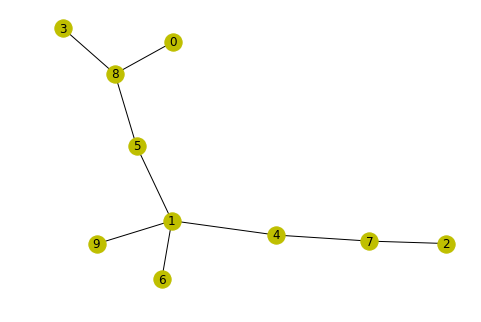

In [34]:
# Part 4: Is there a sense of distance between nodes that becomes apparent through these traversals?...
# ...Could a variant of BFS be used to compute such distances between nodes in G?
print("Yes, a stronger sense of distance can be observed from a starting node to all other nodes using spanning tree of BFS traversals")

print("\nDFS (Depth-First Search) is another variant which can be used to compute such distances between nodes")

# DFS (using code from lecture notes)

def random_tree(n):
    code = [choice(range(n)) for k in range(n-2)]
    return tree_pruefer(code)

T = random_tree(10)
nx.draw(T, **opts)

TT = T.copy()
x = 0
stack = [x]
while len(stack) > 0:
    y = stack.pop()
    stack.extend(TT[y])
    TT.remove_node(y)
    print(y, stack)

 ... text goes here ...